# Contours and wateshed Segmentation

In [14]:
import sys ; sys.path.append("../") # osx
import cvlib

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

plt.style.use(['dark_background'])
%matplotlib inline

# CONTOURS
- Floodfil Algorithm
- cv.findContours cv.drawContours

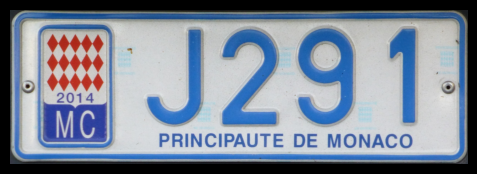

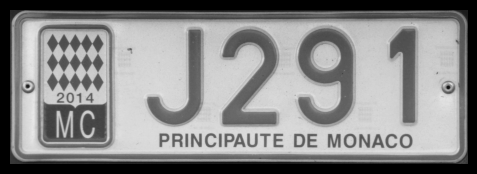

In [16]:
img_bgr = cv.imread('C:\GitHub\pythonPrograms\computerVision2023\clases\imagenes\License_plate_Monaco_2014.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
cvlib.imgview(img)
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
cvlib.imgview(img)

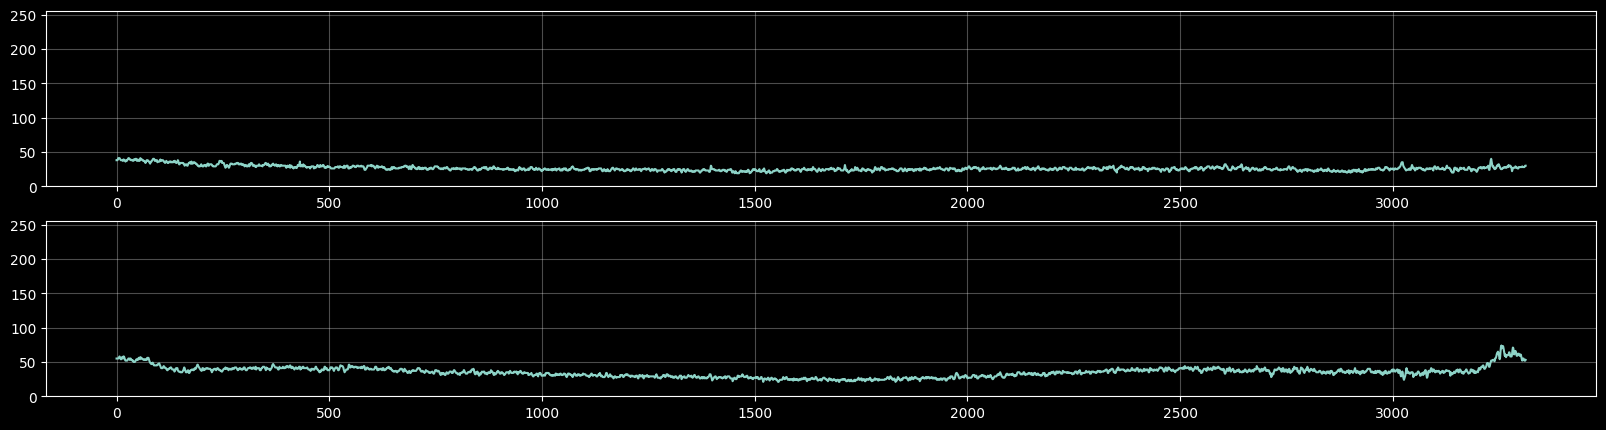

In [17]:
def view_lim(im):
    """ Plot top and bottom row of an image
    Args:
        im (numpy array): Image to plot
    
    Returns:
        None
    """
    
    edge= im.shape[0]-5
    
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(211)
    ax1.plot(im[0,:])
    ax1.set_ylim(0,255)
    ax1.grid(alpha=0.3)
    
    ax2=fig.add_subplot(212)
    ax2.plot(im[edge,:])
    ax2.set_ylim(0,255)
    ax2.grid(alpha=0.3)
    
view_lim(img)

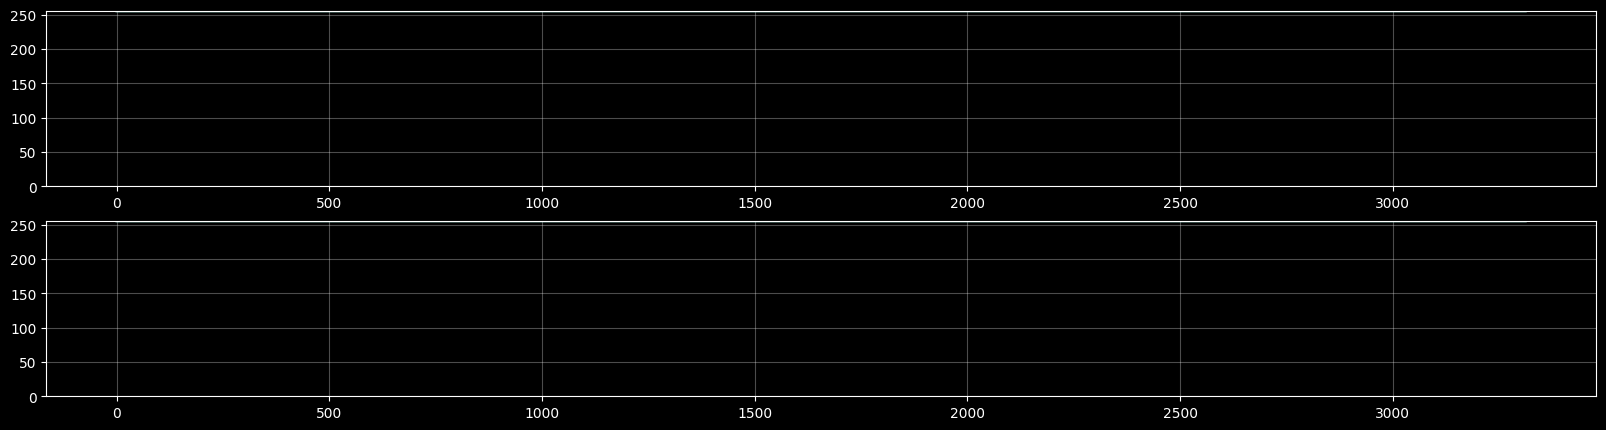

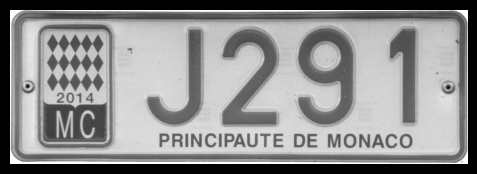

In [45]:
im_floodfill = img.copy()
D = 40
cv.floodFill(im_floodfill, None, (0 ,0), 255,  loDiff=D, upDiff=D, flags=cv.FLOODFILL_FIXED_RANGE)
view_lim(im_floodfill)
cvlib.imgview(im_floodfill)


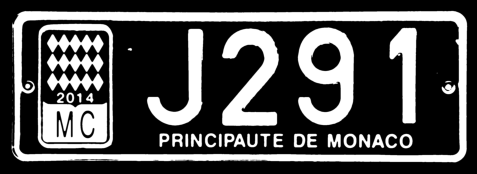

In [47]:
b = 15
img_blur = cv.blur(im_floodfill,(b,b))
img_bin = cv.threshold(img_blur,128,255,cv.THRESH_BINARY_INV|cv.THRESH_OTSU)[1]
cvlib.imgview(img_bin)

https://docs.opencv.org/3.4.0/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a


Hierarchy:
https://docs.opencv.org/3.4/d9/d8b/tutorial_py_contours_hierarchy.html

[Next, Previous, First_Child, Parent]

In [48]:
contours, hierarchy = cv.findContours(img_bin, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [49]:
for i in range(len(contours)):
    area = cv.contourArea(contours[i])
    print(i,area, end=' | ')

0 0.0 | 1 0.0 | 2 0.0 | 3 0.0 | 4 14.5 | 5 0.0 | 6 0.0 | 7 0.0 | 8 1.0 | 9 0.0 | 10 21.0 | 11 3510286.5 | 12 26.0 | 13 52.0 | 14 2.0 | 15 2.0 | 16 71.0 | 17 139.0 | 18 536.0 | 19 857.0 | 20 612.0 | 21 12.0 | 22 60.0 | 23 1845.0 | 24 978.5 | 25 3042759.0 | 26 4782.5 | 27 339.0 | 28 4831.0 | 29 7678.5 | 30 2949.5 | 31 3901.5 | 32 6270.5 | 33 4254.0 | 34 7637.0 | 35 2899.5 | 36 6958.0 | 37 2324.5 | 38 3908.0 | 39 2399.0 | 40 4395.0 | 41 381.5 | 42 1648.0 | 43 4556.5 | 44 1666.0 | 45 3613.5 | 46 4499.0 | 47 831.5 | 48 5346.5 | 49 907.5 | 50 4474.5 | 51 854.5 | 52 3544.0 | 53 4461.5 | 54 28.5 | 55 951.5 | 56 289.0 | 57 9.0 | 58 0.0 | 59 185.5 | 60 388.0 | 61 94462.0 | 62 45.0 | 63 8.5 | 64 140980.0 | 65 78755.5 | 66 190462.5 | 67 33035.5 | 68 474887.0 | 69 403764.0 | 70 125947.5 | 71 9837.5 | 72 6257.0 | 73 1130.5 | 74 2040.0 | 75 206.0 | 76 3308.5 | 77 1159.0 | 78 1982.0 | 79 28270.0 | 80 28912.5 | 81 30059.5 | 

In [71]:
hierarchy[0][13]

array([14, 12, -1, 11], dtype=int32)

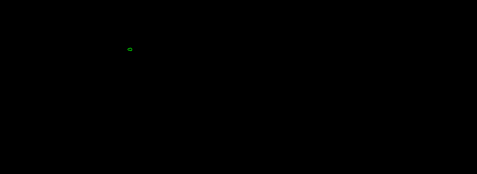

In [70]:
backtorgb = cv.cvtColor(np.zeros(img_bin.shape,dtype=np.uint8), cv.COLOR_GRAY2RGB)
from time import sleep
color = (0,255,0)
thickness = 3
contour_index = 60
img_cnt = cv.drawContours(backtorgb, contours, contour_index, color, thickness)
cvlib.imgview(img_cnt)


# WATESHED SEGMENTATATION Algorithm

In [72]:
img_bgr = cv.imread('C:\GitHub\pythonPrograms\computerVision2023\clases\imagenes\cards.png',cv.IMREAD_COLOR)
# img_bgr = cv.imread('im/cells.png',cv.IMREAD_COLOR)

img = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

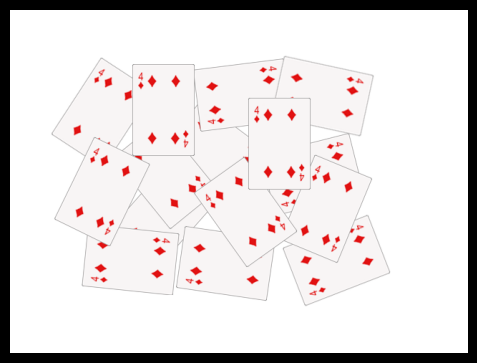

In [73]:
cvlib.imgview(img)

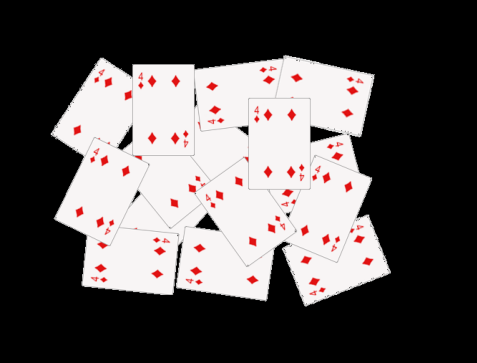

In [75]:
img[np.all(img == 255, axis=2)] = 0
# img = 255-img
cvlib.imgview(img)


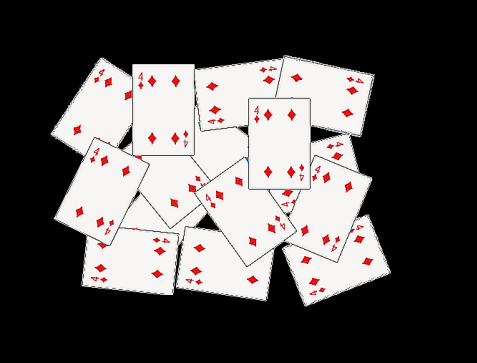

In [76]:
# Create a kernel that we will use to sharpen our image
# an approximation of second derivative, a quite strong kernel
kernel = np.array([[1, 1, 1], 
                   [1, -8, 1], 
                   [1, 1, 1]], dtype=np.float32)
# do the laplacian filtering as it is
# well, we need to convert everything in something more deeper then CV_8U
# because the kernel has some negative values,
# and we can expect in general to have a Laplacian image with negative values
# BUT a 8bits unsigned int (the one we are working with) can contain values from 0 to 255
# so the possible negative number will be truncated
imgLaplacian = cv.filter2D(img, cv.CV_32F, kernel)
sharp = np.float32(img)
imgResult = sharp - imgLaplacian

# convert back to 8bits gray scale
imgResult = np.clip(imgResult, 0, 255)
imgResult = imgResult.astype('uint8')

imgLaplacian = np.clip(imgLaplacian, 0, 255)
imgLaplacian = np.uint8(imgLaplacian)

cvlib.imgview(imgResult)

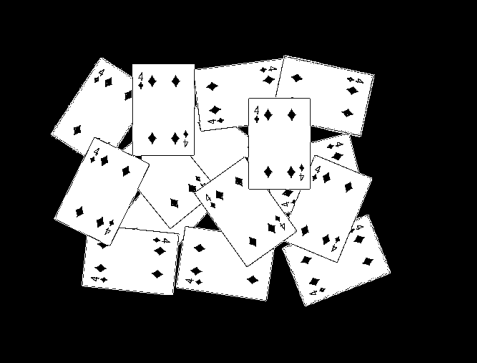

In [77]:
# Create binary image from source image
bw = cv.cvtColor(imgResult, cv.COLOR_RGB2GRAY)
_, bw = cv.threshold(bw, 40, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
cvlib.imgview(bw)

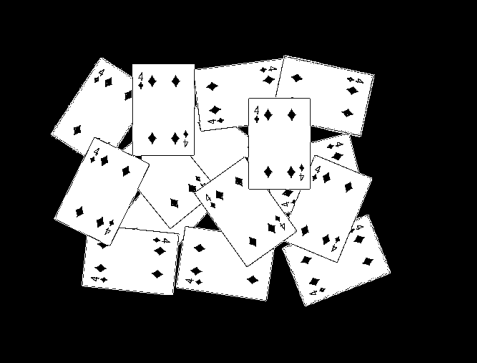

In [78]:
cvlib.imgview(bw)

In [79]:
dist = cv.distanceTransform(bw, cv.DIST_L2, 3)

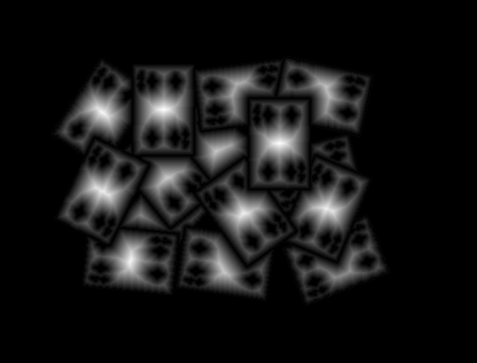

In [81]:
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv.normalize(dist, dist, 0, 255.0, cv.NORM_MINMAX)

cvlib.imgview(dist)

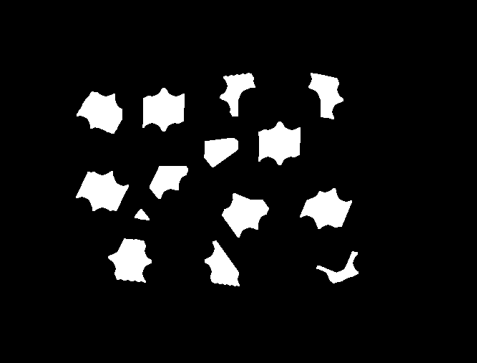

In [82]:
_, dist = cv.threshold(dist, 100, 255, cv.THRESH_BINARY)

# Dilate the dist image
kernel_dilate = np.ones((3,3), dtype=np.uint8)
dist = cv.dilate(dist, kernel_dilate)
cvlib.imgview(dist)

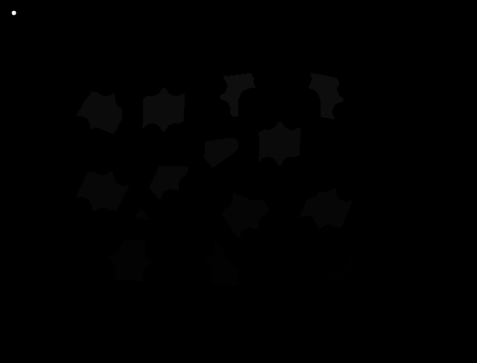

In [83]:
# findContours needs uint8 type
dist_8u = dist.astype('uint8')
contours, _ = cv.findContours(dist_8u, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

markers = np.zeros(dist.shape, dtype=np.int32)
for i in range(len(contours)):
    cv.drawContours(markers, contours, i, (i+1), -1)


cv.circle(markers, (5,5), 3, (255,255,255), -1)

cvlib.imgview(markers)


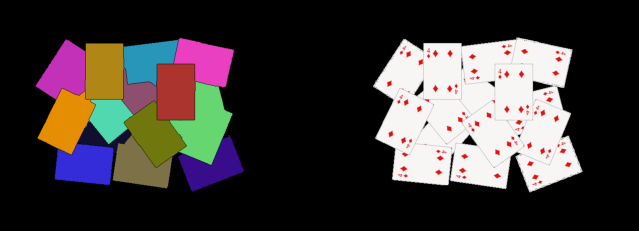

In [84]:
import random as rng
rng.seed(42)

cv.watershed(imgResult, markers)
#mark = np.zeros(markers.shape, dtype=np.uint8)
mark = markers.astype('uint8')
mark = cv.bitwise_not(mark)


# Generate random colors list
colors = []
for contour in contours:
    colors.append((rng.randint(0,256), rng.randint(0,256), rng.randint(0,256)))
    
# Create the result RGB image
dst = np.zeros((markers.shape[0], markers.shape[1], 3), dtype=np.uint8)

# color per index value
r, c = markers.shape
for i in range(r):
    for j in range(c):
        index = markers[i,j]
        if index > 0 and index <= len(contours):
            dst[i,j,:] = colors[index-1]


cvlib.imgcmp(dst,img)

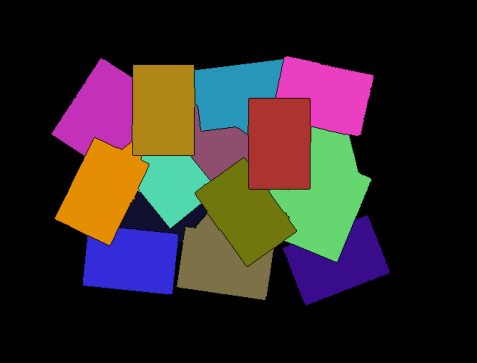

In [85]:
cvlib.imgview(dst)

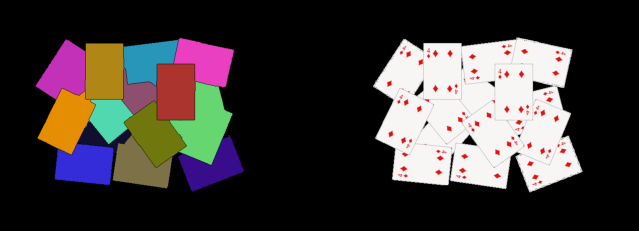

In [86]:
cvlib.imgcmp(dst,img)